In [1]:
import numpy as np
import random as rnd
import pandas as pd

In [2]:
DIR='AI\\data\\'
file='conected_v6.csv'
df = pd.read_csv(DIR+file,index_col=0)
T=51
D=4

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,Y_1_1.0,Y_2_1.0,Y_3_1.0,Y_4_1.0,Y_5_1.0,Y_1_1.5,Y_2_1.5,Y_3_1.5,Y_4_1.5,Y_5_1.5
0,-0.049035,-0.565848,0.736594,-1.071490,0.038483,-0.177512,0.094612,0.230351,0.164424,0.165772,...,1,1,1,1,1,1,1,1,1,1
1,0.039335,-0.580337,0.725564,-1.054353,-0.177136,0.095233,0.230416,0.164082,0.165030,0.107108,...,2,2,2,2,2,2,1,2,1,1
2,-0.176343,-0.245664,0.112186,-0.392810,0.095632,0.231046,0.164146,0.164687,0.106358,0.078392,...,1,1,1,1,1,1,1,1,1,1
3,0.096500,-0.232964,0.484342,-0.378075,0.231456,0.164772,0.164752,0.106017,0.077638,-0.044117,...,1,1,1,1,1,1,1,1,1,1
4,0.232361,-0.272170,0.828325,-0.454012,0.165177,0.165378,0.106081,0.077298,-0.044887,-0.420266,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0.184166,1.962744,-0.021661,0.587204,0.731257,0.964081,1.041825,3.234800,1.908321,2.534894,...,1,1,2,2,2,1,1,2,2,1
888,0.735659,0.545087,0.702022,-0.384440,0.970953,1.044492,3.235707,1.908341,2.534946,1.188581,...,1,1,1,2,2,1,1,1,2,2
889,0.975711,-0.468227,0.813919,-1.084755,1.051636,3.239496,1.909412,2.534726,1.188518,0.487329,...,2,2,2,2,2,2,2,2,2,2
890,1.056514,-0.999973,0.973794,-1.424199,3.254083,1.912523,2.535719,1.188814,0.487206,-0.174885,...,2,2,2,2,2,1,2,2,2,2


In [4]:
X=df.iloc[:,:204].to_numpy().reshape(-1,T,D)
Y=df.iloc[:,207].to_numpy()

In [5]:
X

array([[[-0.04903535, -0.56584838,  0.73659357, -1.07149026],
        [ 0.03848289, -0.17751165,  0.0946116 ,  0.23035054],
        [ 0.16442432,  0.16577192,  0.1076259 ,  0.07936616],
        ...,
        [-1.27649181, -1.35737066, -1.27694393, -1.31416704],
        [-1.33036572, -1.3254846 , -1.30126178, -1.38222027],
        [-1.329992  , -1.25251078, -1.31982375, -1.35013734]],

       [[ 0.03933508, -0.58033652,  0.72556423, -1.05435278],
        [-0.17713559,  0.09523346,  0.23041573,  0.16408154],
        [ 0.16503001,  0.10710791,  0.07891085, -0.04313238],
        ...,
        [-1.35429698, -1.2736824 , -1.31114647, -1.3272626 ],
        [-1.3225355 , -1.29882967, -1.38012419, -1.32741154],
        [-1.25039957, -1.31791947, -1.34803691, -1.33361377]],

       [[-0.17634284, -0.24566446,  0.11218622, -0.39280953],
        [ 0.09563226,  0.2310458 ,  0.16414622,  0.16468721],
        [ 0.10635803,  0.07839185, -0.04359317, -0.41925187],
        ...,
        [-1.27065978, -1.30

In [45]:
#X=np.expand_dims(X,-D)
X_train=X[0:2500]
X_test=X[2500:]
Y_train=Y[0:2500]
Y_test=Y[2500:]


In [46]:
Y_train

array([1, 2, 2, ..., 2, 1, 1], dtype=int64)

In [47]:
import tensorflow as tf

from tensorflow.keras.layers import Input,SimpleRNN,GRU,LSTM,Dense,Flatten,GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
i = Input(shape=(T,D))
#x=SimpleRNN(5)(i)
x=LSTM(30,return_sequences=True)(i)
x=GlobalMaxPool1D()(x)
x=Dense(4,activation='softmax')(x)
model=Model(i,x)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [50]:
r = model.fit(
    X_train,Y_train,
    epochs=3,
    validation_data=[X_test,Y_test]
)

Train on 2500 samples, validate on 1062 samples
Epoch 1/3
2500/2500 [==============================] - 7s 3ms/sample - loss: 1.2692 - accuracy: 0.3528 - val_loss: 1.1189 - val_accuracy: 0.4802
Epoch 2/3
2500/2500 [==============================] - 3s 1ms/sample - loss: 1.1308 - accuracy: 0.4256 - val_loss: 1.0891 - val_accuracy: 0.4802
Epoch 3/3
2500/2500 [==============================] - 3s 1ms/sample - loss: 1.1218 - accuracy: 0.4268 - val_loss: 1.0901 - val_accuracy: 0.4821


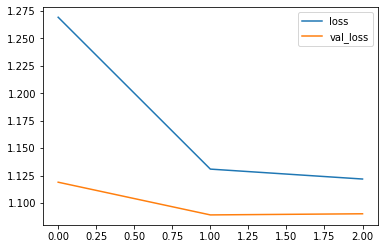

In [51]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

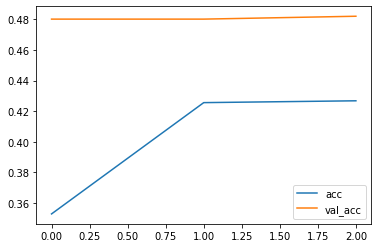

In [52]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import itertools


def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Noramlized confusion matrix")
  else:
    print("Confusion matrix without normalisation")
  print(cm) 
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  ticks_marks=np.arange(len(classes))
  plt.xticks(ticks_marks,classes,rotation=45)
  plt.yticks(ticks_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
            horizontalalignment="center",
            color="white" if cm[i,j] >thresh else "black")
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

Confusion matrix without normalisation
[[  0 224  10   0]
 [  0 483  25   0]
 [  0 279  29   0]
 [  0  10   2   0]]


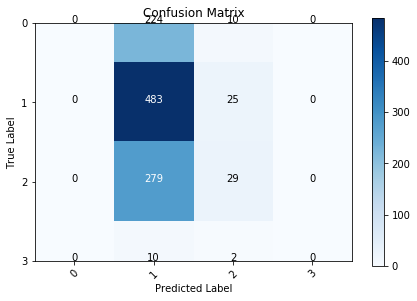

In [54]:
p_test=model.predict(X_test).argmax(axis=1)
cm=confusion_matrix(Y_test,p_test)
plot_confusion_matrix(cm,list(range(4)),normalize=False)

In [19]:
459/(312+459)

0.5953307392996109

In [31]:
Y_test

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [33]:
np.sum(Y_test==0)

393

In [55]:
T=8
D=2
M=3

In [69]:
X=np.random.randn(1,T,D)
X

array([[[ 1.40754643e+00, -4.18324856e-01],
        [-7.02830153e-01, -6.73405686e-01],
        [ 1.71764038e+00, -1.14770225e+00],
        [-2.20050699e-01, -4.20670198e-01],
        [-5.31714055e-01, -8.94843420e-01],
        [-1.56039821e-01, -2.95784596e-01],
        [-2.77088464e-01, -1.84104834e-02],
        [ 5.12931701e-04,  7.04426977e-01]]])

In [83]:
def lstm1():
    input_=Input(shape=(T,D))
    rnn= LSTM(M,return_state=True)
    x=rnn(input_)
    model=Model(inputs=input_,outputs=x)
    o,h,c=model.predict(X)
    print("o: ",o)
    print("h: ",h)
    print("c: ",c)

In [84]:
def lstm2():
    input_=Input(shape=(T,D))
    rnn= LSTM(M,return_state=True,return_sequences=True)
    x=rnn(input_)
    model=Model(inputs=input_,outputs=x)
    o,h,c=model.predict(X)
    print("o: ",o)
    print("h: ",h)
    print("c: ",c)

In [85]:
def gru1():
    input_=Input(shape=(T,D))
    rnn= GRU(M,return_state=True)
    x=rnn(input_)
    model=Model(inputs=input_,outputs=x)
    o,h=model.predict(X)
    print("o: ",o)
    print("h: ",h)
    

In [81]:
def gru2():
    input_=Input(shape=(T,D))
    rnn= GRU(M,return_state=True,return_sequences=True)
    x=rnn(input_)
    model=Model(inputs=input_,outputs=x)
    o,h=model.predict(X)
    print("o: ",o)
    print("h: ",h)
   

In [82]:
lstm1()

o:  [[-0.01046858 -0.00236709  0.03869972 -0.03184954 -0.00456555 -0.01747812
   0.01007709  0.01154477 -0.03051326 -0.03772925  0.00293597  0.02225043
  -0.00471041  0.00949872  0.01348086 -0.00272635  0.0307532   0.00170247
   0.01850362 -0.01841523 -0.0076476   0.02754544 -0.02429512  0.00858908
   0.00620388  0.0258147   0.02864497  0.01750099 -0.00045392  0.02095184
   0.00580269 -0.00034873 -0.02048089  0.02833989 -0.04497034 -0.00601255
  -0.00904575  0.01932745 -0.00679392  0.00478228 -0.04525786 -0.00530615
   0.01319039 -0.00579331  0.00500469 -0.01578118 -0.03171137  0.02706317
   0.01452853 -0.02175341]]
h:  [[-0.01046858 -0.00236709  0.03869972 -0.03184954 -0.00456555 -0.01747812
   0.01007709  0.01154477 -0.03051326 -0.03772925  0.00293597  0.02225043
  -0.00471041  0.00949872  0.01348086 -0.00272635  0.0307532   0.00170247
   0.01850362 -0.01841523 -0.0076476   0.02754544 -0.02429512  0.00858908
   0.00620388  0.0258147   0.02864497  0.01750099 -0.00045392  0.02095184
  

In [75]:
lstm2()

o:  [[[ 0.01818732  0.16536829  0.04932903]
  [-0.10267079  0.07040832 -0.04963439]
  [-0.18937162  0.23162453  0.01886279]
  [-0.18584934  0.14120731 -0.05717639]
  [-0.2570666   0.11736282 -0.14771894]
  [-0.22490998  0.11439785 -0.1607892 ]
  [-0.18082997  0.04027674 -0.1761276 ]
  [-0.05887245 -0.08377749 -0.1374134 ]]]
h:  [[-0.05887245 -0.08377749 -0.1374134 ]]
c:  [[-0.12303069 -0.1575231  -0.27607322]]


In [76]:
gru1()

o:  [[0.08945833 0.16522127 0.2827808 ]]
h:  [[0.08945833 0.16522127 0.2827808 ]]


In [77]:
gru2()

o:  [[[ 0.01845346 -0.35792798 -0.48624668]
  [-0.12593797 -0.22195771 -0.00429471]
  [-0.1022834  -0.5869286  -0.5437558 ]
  [-0.16233616 -0.36883515 -0.2039573 ]
  [-0.17064014 -0.33997577  0.10242363]
  [-0.09517461 -0.22627288  0.13775668]
  [-0.03471153 -0.06108828  0.18005027]
  [ 0.04500476  0.14780349  0.06747033]]]
h:  [[0.04500476 0.14780349 0.06747033]]


In [94]:
from tensorflow.keras.layers import Bidirectional

input_=Input(shape=(T,D))
rnn= Bidirectional(LSTM(M,return_state=True,return_sequences=True))
x=rnn(input_)
model=Model(inputs=input_,outputs=x)
o,h1,c1,h2,c2=model.predict(X)
print("o: ",o)
print("o,shape: ",o.shape)
print("h1: ",h1)
print("c1: ",c1)
print("h2: ",h2)
print("c2: ",c2)

o:  [[[ 0.03046946 -0.18311667 -0.03992933 -0.36037806 -0.31156415
   -0.11523542]
  [ 0.09259506 -0.12218439  0.07187682 -0.4125602  -0.13861655
   -0.2962683 ]
  [ 0.14538357 -0.31050473  0.09380618 -0.36417904 -0.35387772
   -0.11414115]
  [ 0.19861007 -0.18831411  0.10475244 -0.13258967 -0.01034367
   -0.17408162]
  [ 0.21645781 -0.13863665  0.15310976 -0.09597902 -0.01887728
   -0.16297467]
  [ 0.24474005 -0.08220866  0.19634528  0.03689302  0.00861771
   -0.01504823]
  [ 0.22448765  0.00617996  0.17707781  0.08281825  0.03175213
    0.05727482]
  [ 0.06609493  0.1541369   0.05724141  0.06698998  0.03683484
    0.10002844]]]
o,shape:  (1, 8, 6)
h1:  [[0.06609493 0.1541369  0.05724141]]
c1:  [[0.11058262 0.30351946 0.09971693]]
h2:  [[-0.36037806 -0.31156415 -0.11523542]]
c2:  [[-1.186191   -0.5356083  -0.32851112]]
